# Yelp
## Datos en Json
### PySpark

Este proyecto trata de analizar **8.65 GB de datos** con extensión **.json**. Se tratan de datos procedentes de un buscador de servicios/negocios muy utilizado en USA llamado **Yelp**. En el vienen **datos relacionados con las opiniones de los clientes, valoraciones por estrellas, localización, nombre del local, su categoría y otros atributos**.

link data: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset?select=Dataset_User_Agreement.pdf

El supuesto práctico que he pensado para este proyecto seria que un **cliente X quiere realizar inversiones directas hacia los negocios mejor valorados, utilizando las opiniones de los mejores negocios de este buscador Yelp**, queriendo conocer su **nombre, lugar,calle, su categoria y  el total de buenas valoraciones.**
También quiere conocer que **categorias de negocios existen con mayor tasa de éxito visualizando todas sus valoraciones ya sean buenas y malas**.

In [1]:
import pandas as pd
from IPython.display import Image
import findspark
findspark.init()
findspark.find()

'C:\\spark\\spark-2.4.3-bin-hadoop2.7'

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [3]:
spark = SparkSession.builder.appName('Yelp.com').getOrCreate()

In [4]:
df = spark.read.json('C:/Users/USUARIO/Desktop/DataJSON/*.json') # 8GB de datos
df.printSchema() # Esquema

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [5]:
# 10.169.368 millones de datos
df.count()

10169368

### 1º Parte
**Objetivo: Sacar las opiniones de los mejores negocios de este buscador Yelp, conociendo su nombre, lugar,calle, su categoria y el total de buenas valoraciones**.

**Primero** voy a realizar **una consulta** utilizando **sql** solamente para **mostrar las id de los negocios y que me las contará para luego agruparlas y ordernarlas de forma descendente**. **Después** de conocer las id de los mejores negocios ordenadas de mayor a menor respecto al total de valoraciones de 5 estrellas voy a **almacenar estas id en un diccionario que utilizaré posteriormente en un bucle**. 

In [6]:
# Visualizo los id de los negocios que tienen 5 estrellas de valoración
df.createOrReplaceTempView("Yelp")

consulta = spark.sql("select business_id, count(business_id) as total_5_estre from Yelp y where stars == 5.0 group by business_id order by total_5_estre desc").toPandas()
consulta

,business_id,total_5_estre
0,ytynqOUb3hjKeJfRj5Tshw,4014
1,ac1AeYqs8Z4_e2X5M3if2A,4012
2,GXFMD0Z4jEVZBCsbPf4CTQ,3838
3,_ab50qdWOk0DdB6XOrBitw,3645
4,_C7QiQQc47AOEv4PE3Kong,3095
...,...,...
142710,b6bQagaJvYQmj61tqMZMsA,1
142711,2ZboUJyEAguLBr6NQSJRoA,1
142712,Z4B6wQfzRUVqwokyJO5Ycw,1
142713,8EjlIjxXKB9FMyZ6c2kGNg,1


In [7]:
# Automatizo la consulta
dict = {}
maximo = 50 # Voy a coger solo los 50 primeros ya que hay id con una sola valoracion de 5 estrellas
for i in range(maximo):
    dict[i] = consulta.iloc[i,0]
print(dict)

{0: 'ytynqOUb3hjKeJfRj5Tshw', 1: 'ac1AeYqs8Z4_e2X5M3if2A', 2: 'GXFMD0Z4jEVZBCsbPf4CTQ', 3: '_ab50qdWOk0DdB6XOrBitw', 4: '_C7QiQQc47AOEv4PE3Kong', 5: 'oBNrLz4EDhiscSlbOl8uAw', 6: 'yPSejq3_erxo9zdVYTBnZA', 7: 'I_3LMZ_1m2mzR0oLIOePIg', 8: 'gTC8IQ_i8zXytWSly3Ttvg', 9: 'GBTPC53ZrG1ZBY3DT8Mbcw', 10: '6a4gLLFSgr-Q6CZXDLzBGQ', 11: 'ctHjyadbDQAtUFfkcAFEHw', 12: '1b5mnK8bMnnju_cvU65GqQ', 13: 'VVH6k9-ycttH3TV_lk5WfQ', 14: 'VQcCL9PiNL_wkGf-uF3fjg', 15: 'dsfRniRgfbDjC8os848B6A', 16: '9xdXS7jtWjCVzL4_oPGv9A', 17: 'VaO-VW3e1kARkU9bP1E7Fw', 18: 'L5LLN0RafiV1Z9cddzvuCw', 19: 'QHWYlmVbLC3K6eglWoHVvA', 20: 'C9K3579SJgLPp0oAOM29wg', 21: 'xlMQBBt9wrtahdqiRDcVSg', 22: 'qb28j-FNX1_6xm7u372TZA', 23: 'RQAF6a0akMiot5lZZnMNNw', 24: 'ww3YJXu5c18aGZXWmm00qg', 25: '6ajnOk0GcY9xbb5Ocaw8Gw', 26: 'J0joPXxmN-_9Lzafspqdbw', 27: 'GuzbBFraIq-fbkjfvaTRvg', 28: 'mhrW9O0O5hXGXGnEYBVoag', 29: 'UFCN0bYdHroPKu6KV5CJqg', 30: 'UCMSWPqzXjd7QHq7v8PJjQ', 31: 'TcNZXteosegb1RO4O5hREw', 32: 'iSRTaT9WngzB8JJ2YKJUig', 33: 'VAeEXLbEcI9Emt

In [9]:
dfexit = pd.DataFrame()

for id_buss in dict.values():
    dfse = df.select("name", "state", "city", "categories", "address").filter((col("business_id") == id_buss) & (col("name") != 'null')).distinct()
    dfexit = dfexit.append({'Nombre':dfse.collect()[0][0], 'Estado':dfse.collect()[0][1], 'Ciudad':dfse.collect()[0][2], 'Categorias':dfse.collect()[0][3], 'Calle':dfse.collect()[0][4]}, ignore_index=True)

In [10]:
dfexit.insert(5,"Total Num 5 Estrellas", consulta.iloc[0:50, 1],True) # Añador la columna del Total de valoraciones al DF

In [11]:
path = "C:/Users/USUARIO/Desktop/DataJSON/"
dfexit.to_csv( path + "MejoresNegocios.csv", header=True)
dfexit

,Nombre,Estado,Ciudad,Categorias,Calle,Total Num 5 Estrellas
0,Reading Terminal Market,PA,Philadelphia,"Candy Stores, Shopping, Department Stores, Fas...",51 N 12th St,4014
1,Oceana Grill,LA,New Orleans,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",739 Conti St,4012
2,Hattie B’s Hot Chicken - Nashville,TN,Nashville,"American (Traditional), Chicken Shop, Southern...",112 19th Ave S,3838
3,Acme Oyster House,LA,New Orleans,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",724 Iberville St,3645
4,Commander's Palace,LA,New Orleans,"French, Restaurants, Cocktail Bars, Nightlife,...",1403 Washington Ave,3095
5,Ruby Slipper - New Orleans,LA,New Orleans,"Restaurants, American (Traditional), American ...",200 Magazine St,3075
6,Los Agaves,CA,Santa Barbara,"Mexican, Restaurants",600 N Milpas St,2693
7,Pappy's Smokehouse,MO,Saint Louis,"Food, Restaurants, Caterers, Smokehouse, Barbe...",3106 Olive St,2675
8,Cochon Butcher,LA,New Orleans,"Shopping, Butcher, Restaurants, Sandwiches, Fo...",930 Tchoupitoulas St,2537
9,Luke,LA,New Orleans,"German, Restaurants, Seafood, Cocktail Bars, F...",333 Saint Charles Ave,2365


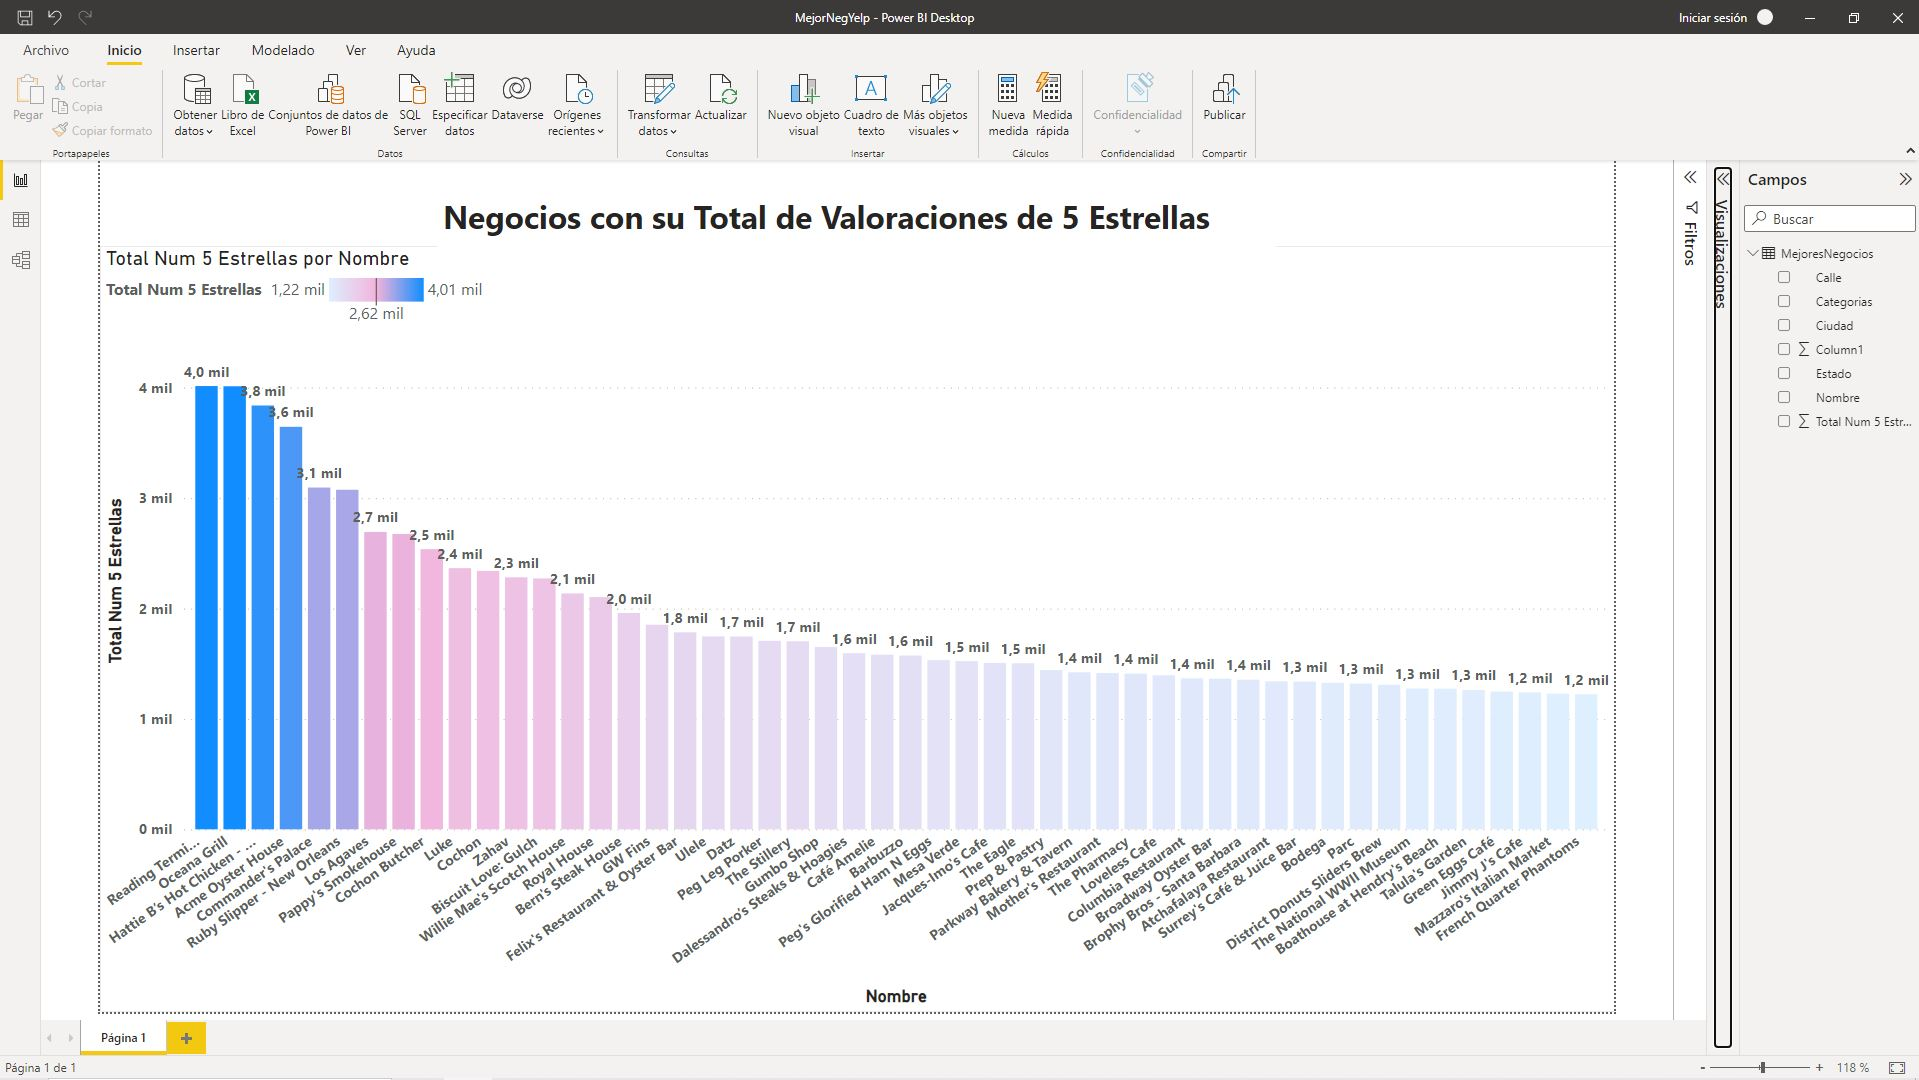

In [3]:
Image("C:/Users/USUARIO/Desktop/DataJSON/yelpbest.jpg") #Power BI

Voy a visualizar cuando se han realizado estas valoraciones en el tiempo, por si acaso fueran valoraciones demasiadas antiguas. De modo que voy a consultar las valoraciones de los 4 mejores negocios. Que serían:
- **Reading Terminal Market**
- **Oceana Grill**
- **Hattie B’s Hot Chicken - Nashville**
- **Acme Oyster House**

Reutilizo la variable dict de la consulta de sql para acceder al id de los 4 mejores negocios.

In [7]:
# Automatizo la consulta
dict = {}
maximo = 4 # Voy a coger solo los 4 primeros ya que hay id con una sola valoracion de 5 estrellas
for i in range(maximo):
    dict[i] = consulta.iloc[i,0]
print(dict)

{0: 'ytynqOUb3hjKeJfRj5Tshw', 1: 'ac1AeYqs8Z4_e2X5M3if2A', 2: 'GXFMD0Z4jEVZBCsbPf4CTQ', 3: '_ab50qdWOk0DdB6XOrBitw'}


In [8]:
path = "C:/Users/USUARIO/Desktop/DataJSON/fechas_csv/"

for id_bus in dict.values():
    fechas = df.select(col("date")).filter((col("business_id") == id_bus) & (col("date") != 'null') )
    fechas_sin_horas  = fechas.withColumn("date", to_date("date"))
    fechas_group = fechas_sin_horas.groupBy("date").count()
    fechas_group_order = fechas_group.orderBy(col("date"))
    nombre = df.select(col("name")).filter((col("business_id") == id_bus) & (col("name") != 'null')).distinct()
    fechas_group_order.toPandas().to_csv( path + str(nombre.collect()[0][0]) + ".csv", header=True)

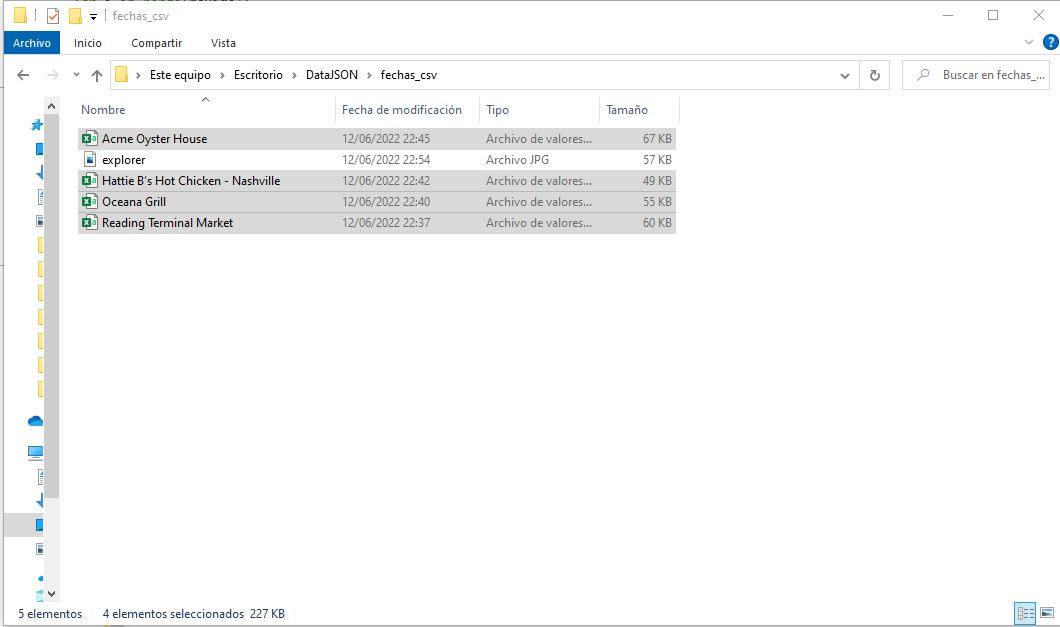

In [8]:
Image("C:/Users/USUARIO/Desktop/DataJSON/fechas_csv/explorer.jpg") #Exploto los datos en csv con Power BI

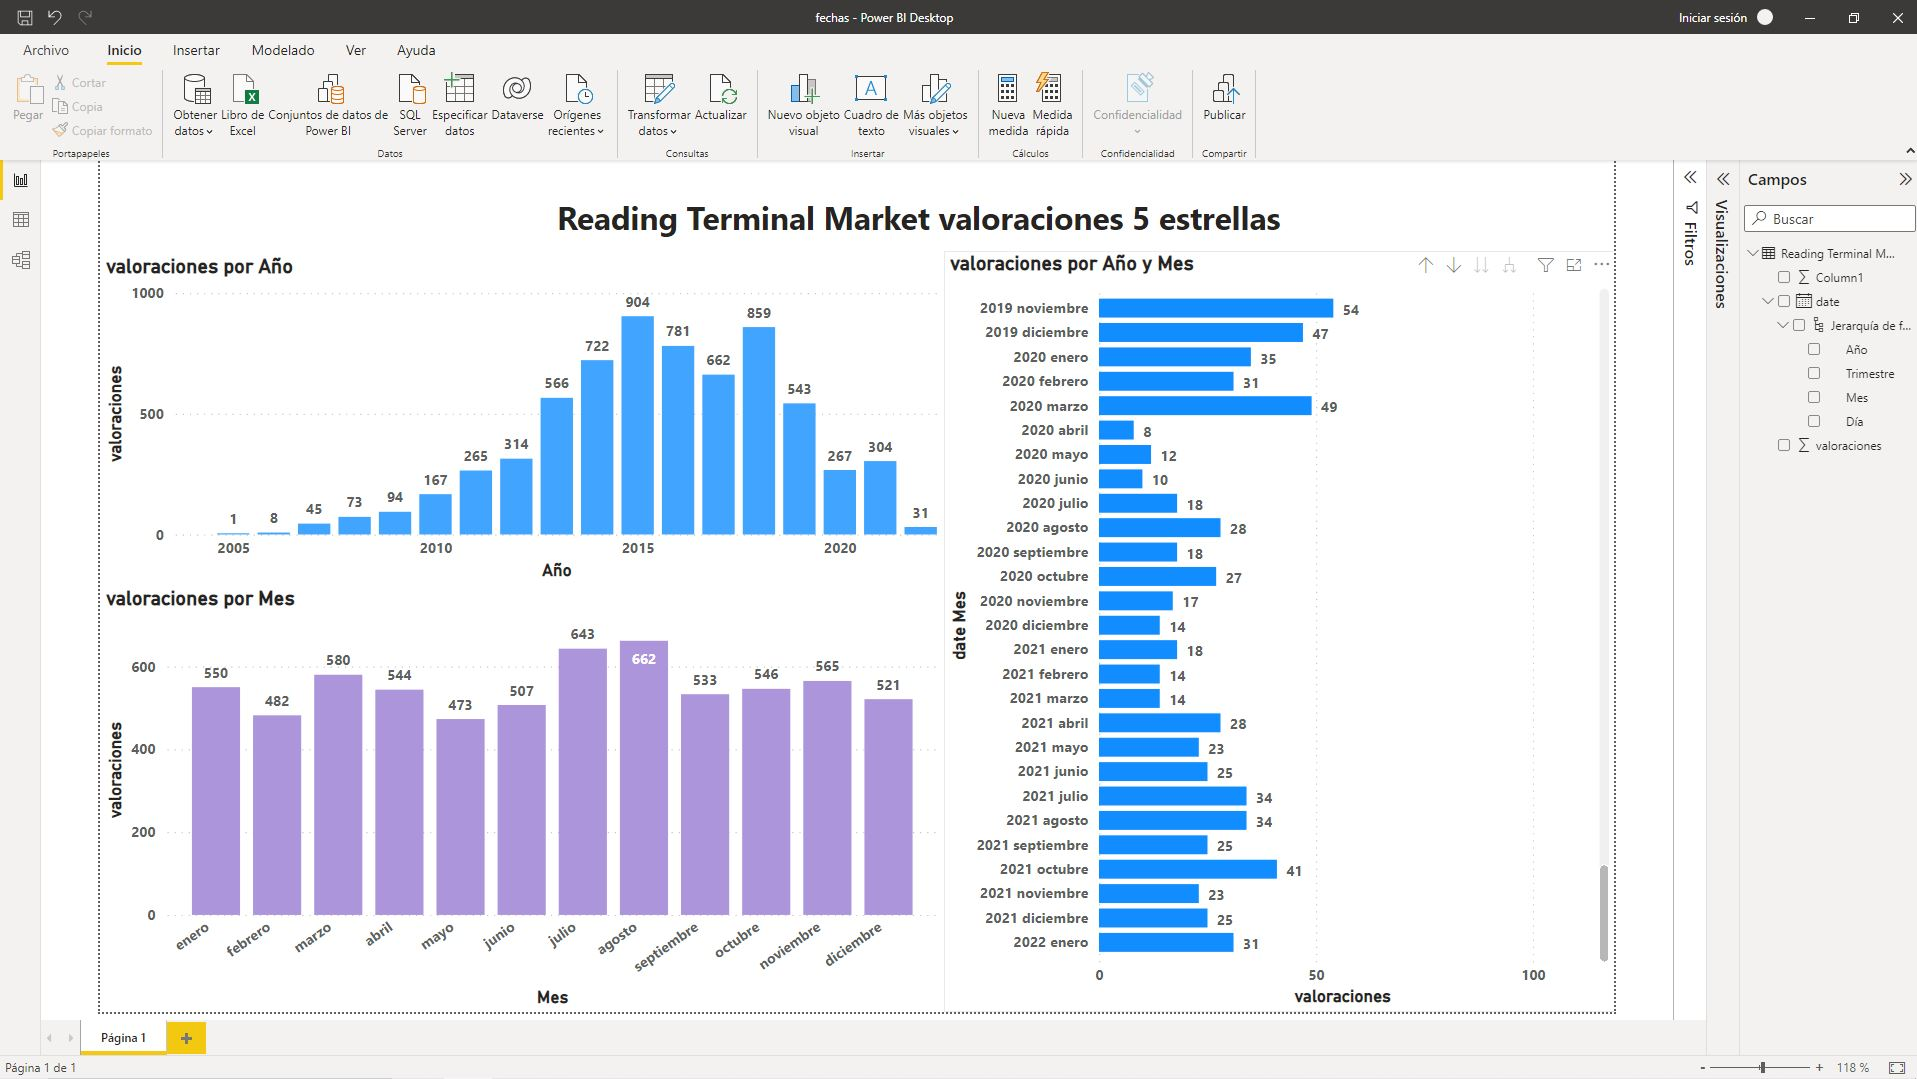

In [9]:
Image("C:/Users/USUARIO/Desktop/DataJSON/fechas_csv/fechas_reading.jpg")

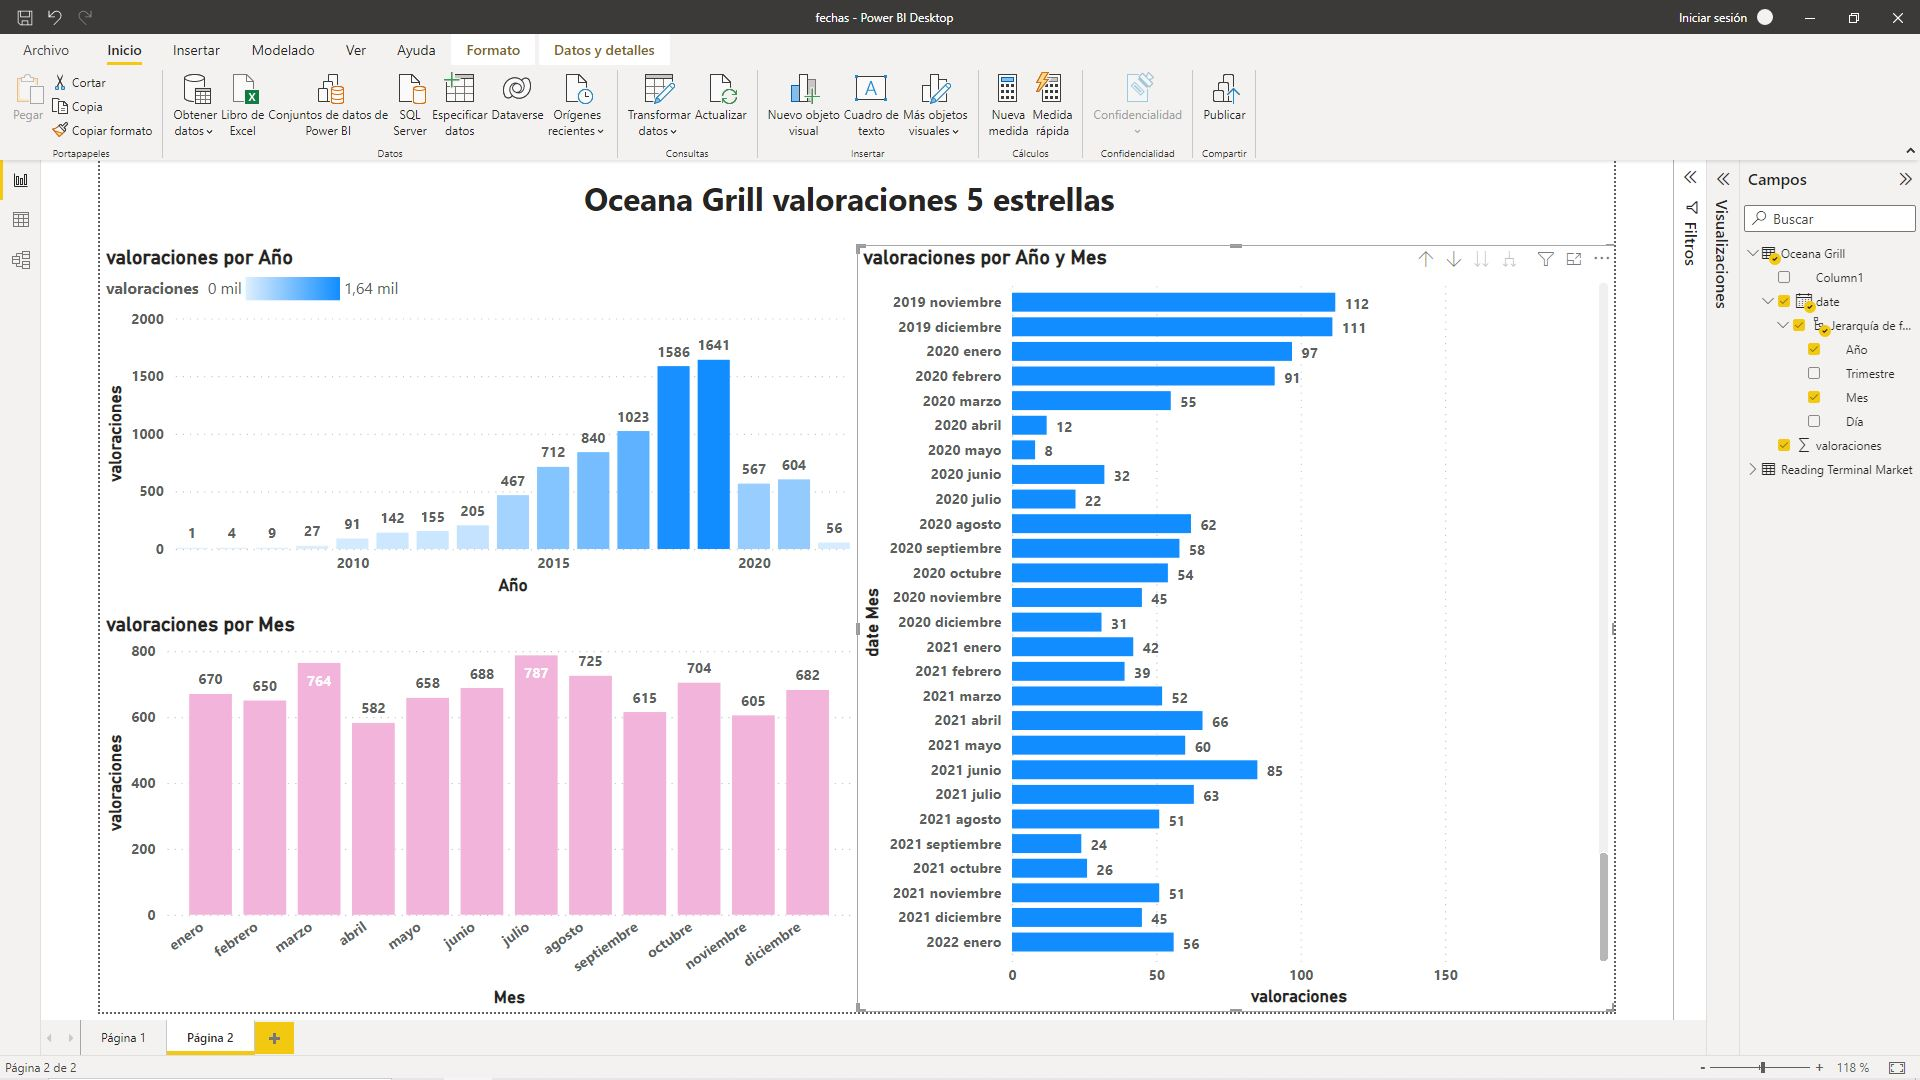

In [10]:
Image("C:/Users/USUARIO/Desktop/DataJSON/fechas_csv/fechas_oceana.jpg")

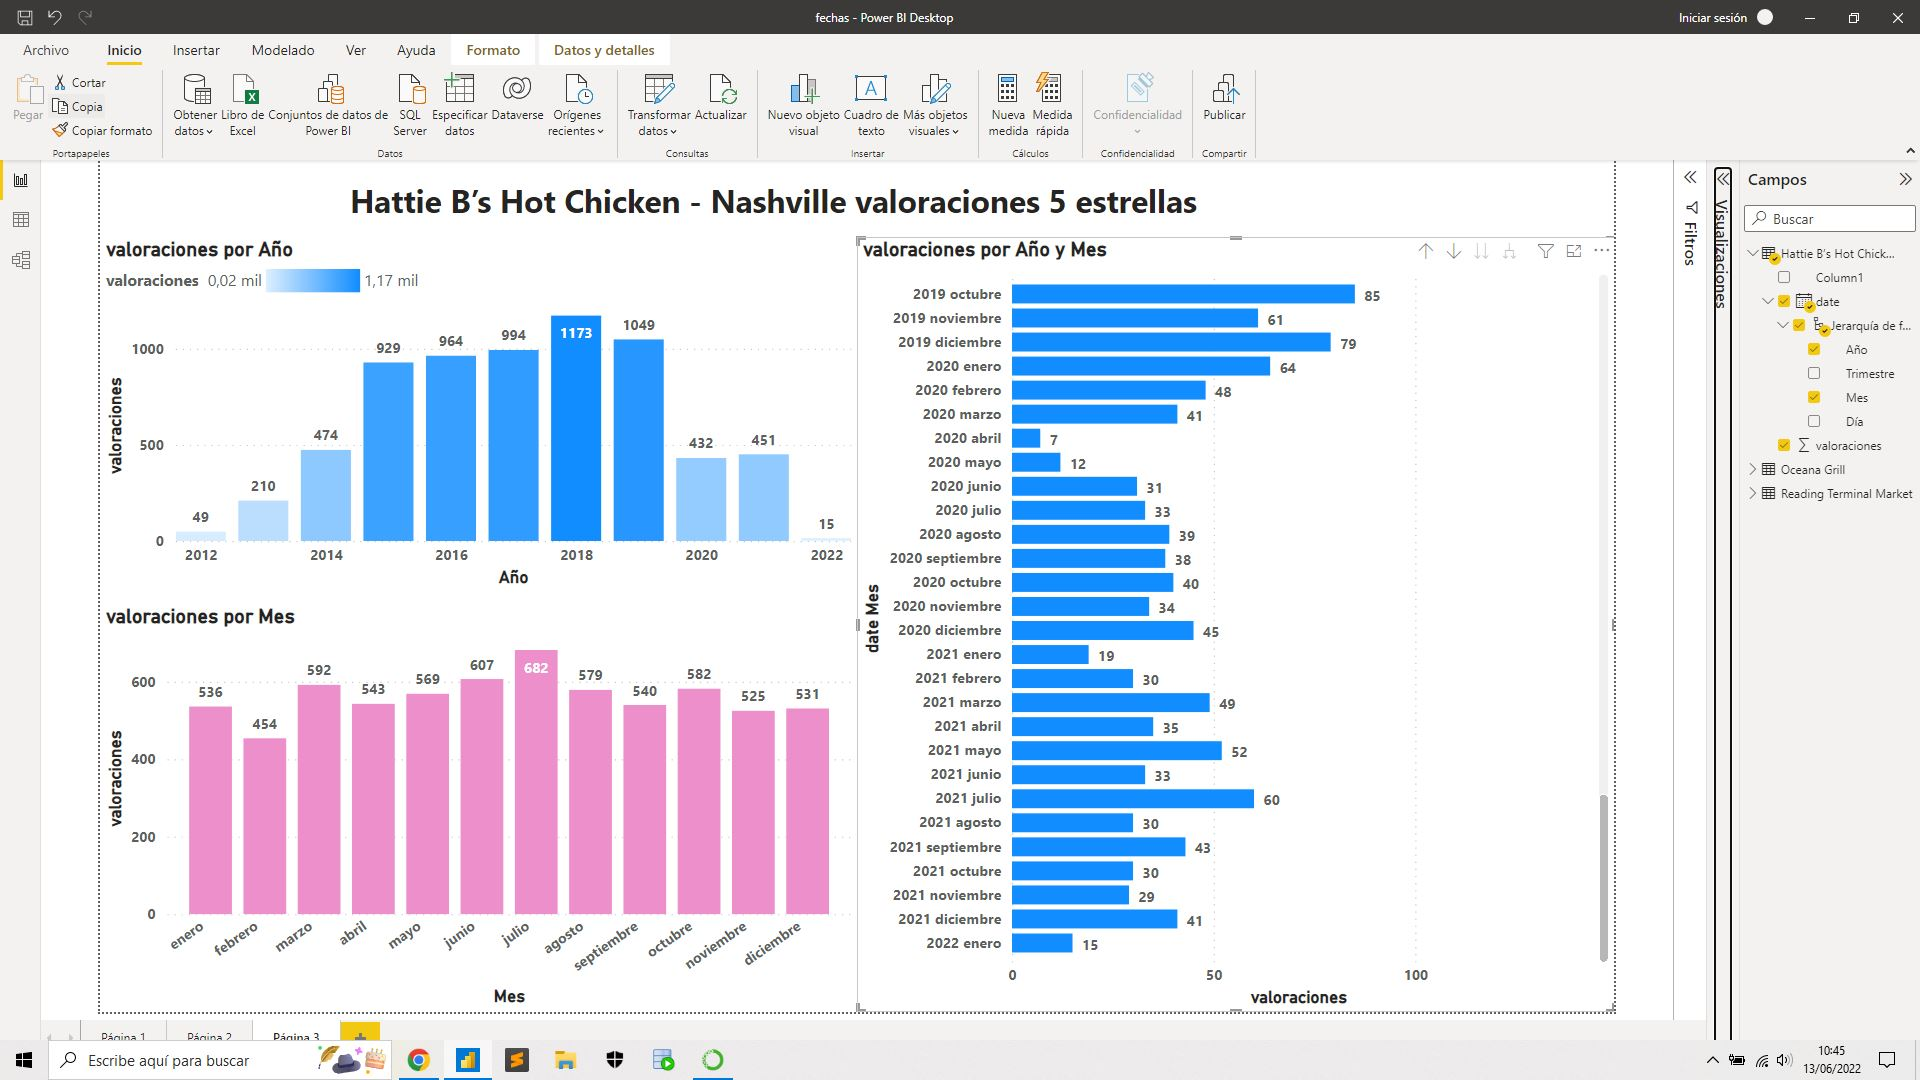

In [11]:
Image("C:/Users/USUARIO/Desktop/DataJSON/fechas_csv/fechas_hattie.jpg")

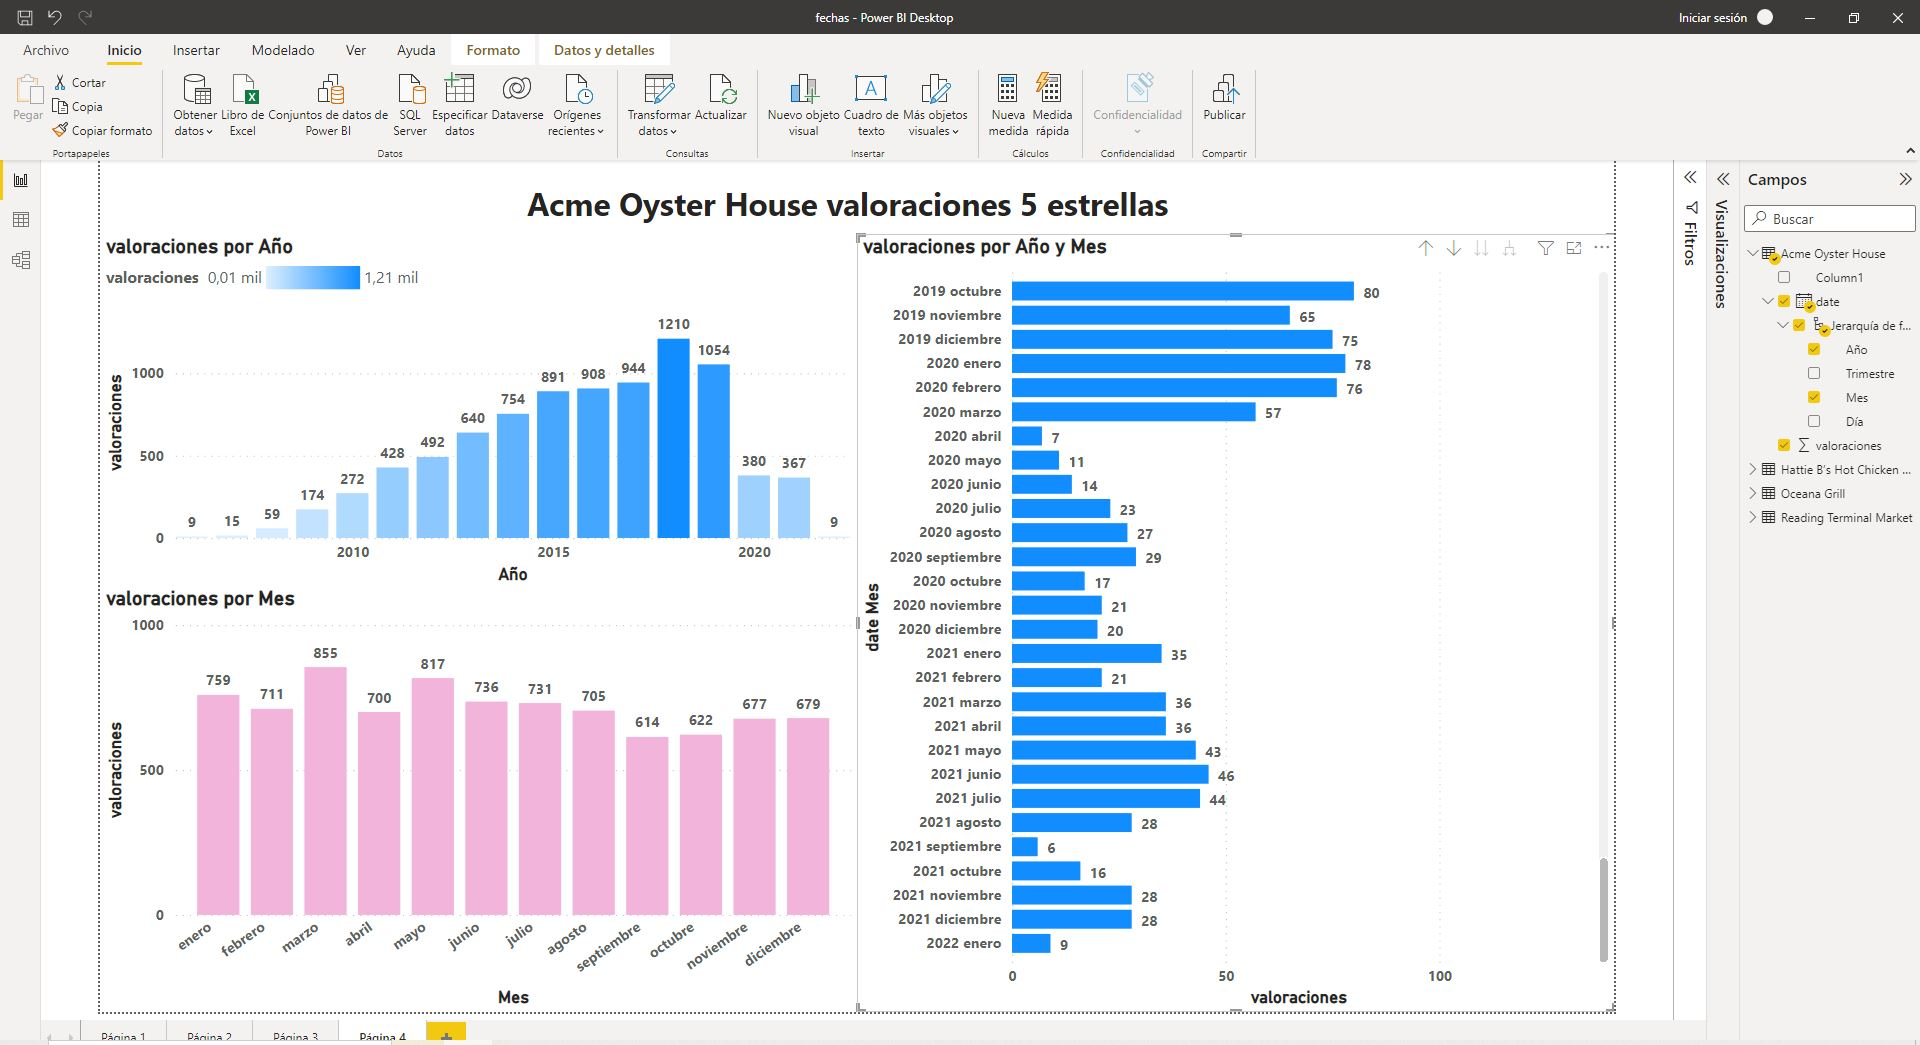

In [12]:
Image("C:/Users/USUARIO/Desktop/DataJSON/fechas_csv/fechas_acme.jpg")

### 2º Parte

**Objetivo: Sacar todas las categorias de negocios existentes con mayor tasa de éxito visualizando todas sus valoraciones ya sean buenas y malas**

**Primero** visualizo todos los **tipos de valoraciones (stars)** menos los nulos. **Almaceno** todos ellos en un **diccionario** que utilizaré posteriormente en un bucle **para** las **consultas** sobre mis datos y para crear sus variables dinámicas en df para su uso **como vistas de datos en sql**. **Luego uniré** estas vistas mediante un **Join** utilizando las columna **categories como clave foranea de las 9 vistas**. 

**Por último,** exploto estos datos en **Power BI para su visualización y posterior informe.**

In [12]:
# Visualizo todos los tipos de estrellas menos los nulos
estrell = df.select('stars').filter(col("stars") != 'NaN').distinct()
estrellPandas = estrell.toPandas()
estrell.show()

+-----+
|stars|
+-----+
|  3.5|
|  4.5|
|  2.5|
|  1.0|
|  4.0|
|  3.0|
|  2.0|
|  1.5|
|  5.0|
+-----+



In [13]:
# Almaceno los tipos de valoraciones en el diccionario
dict = {}
maximo = len(estrellPandas.index)
for i in range(maximo):
    dict[i] = estrell.collect()[i][0]
print(dict)

{0: 3.5, 1: 4.5, 2: 2.5, 3: 1.0, 4: 4.0, 5: 3.0, 6: 2.0, 7: 1.5, 8: 5.0}


In [14]:
# bucle para automatizar las consultas y crear las variables dinámicas que posteriormente se utilizaran como vistas en sql
for idstart in dict.values():
    total_estrellas = df.select('categories').filter((col("stars") == idstart) & (col("categories") != 'null'))
    grupos_cate_estre = total_estrellas.groupby('categories').count()
    grupos_cate_estre = grupos_cate_estre.sort(desc("count"))
    
    Dynamic_Variable_Name = "estrella_" + str(idstart)
    Dynamic_Variable_Name = Dynamic_Variable_Name.replace('.','_')
    globals()[Dynamic_Variable_Name] = grupos_cate_estre # Variable dinámica 

In [15]:
# Creo las vistas temporales de los df de las variables dinámicas creadas anteriorermente
estrella_5_0.createOrReplaceTempView("estrellas_5_0")
estrella_4_5.createOrReplaceTempView("estrellas_4_5")
estrella_4_0.createOrReplaceTempView("estrellas_4_0")
estrella_3_5.createOrReplaceTempView("estrellas_3_5")
estrella_3_0.createOrReplaceTempView("estrellas_3_0")
estrella_2_5.createOrReplaceTempView("estrellas_2_5")
estrella_2_0.createOrReplaceTempView("estrellas_2_0")
estrella_1_5.createOrReplaceTempView("estrellas_1_5")
estrella_1_0.createOrReplaceTempView("estrellas_1_0")


# Como visualmente no me permite ejecutarlo así, por temas del shell, lo dejo de esta forma comentada ya que en una linea
# es difícil de apreciar la consulta que estoy haciendo
"""
joinDF = spark.sql("select e5.categories,\
                           e5.count as Total_num_05, e4_5.count as Total_num_04_5, \
                           e4.count as Total_num_04, e3_5.count as Total_num_03_5, \ 
                           e3.count as Total_num_03, e2_5.count as Total_num_02_5, \
                           e2.count as Total_num_02, e1_5.count as Total_num_01_5, \
                           e1.count as Total_num_01 \ 
                    from estrellas_5_0 e5 inner join estrellas_4_5 e4_5 on e5.categories == e4_5.categories \
                                          inner join estrellas_4_0 e4 on e4_5.categories == e4.categories \
                                          inner join estrellas_3_5 e3_5 on e4.categories == e3_5.categories \
                                          inner join estrellas_3_0 e3 on e3_5.categories == e3.categories \
                                          inner join estrellas_2_5 e2_5 on e3.categories == e2_5.categories \
                                          inner join estrellas_2_0 e2 on e2_5.categories == e2.categories \
                                          inner join estrellas_1_5 e1_5 on e2.categories == e1_5.categories \
                                          inner join estrellas_1_0 e1 on e1_5.categories == e1.categories").toPandas()
"""
# Realizo una consulta a las 9 vistas temporales de valoraciones y las uno con la funcion JOIN utilizando a categories como una
# clave foranea para después convertirlo en un dataframe.
joinDF = spark.sql("select e5.categories, e5.count as Total_num_05, e4_5.count as Total_num_04_5, e4.count as Total_num_04, e3_5.count as Total_num_03_5,  e3.count as Total_num_03, e2_5.count as Total_num_02_5, e2.count as Total_num_02, e1_5.count as Total_num_01_5, e1.count as Total_num_01 from estrellas_5_0 e5 inner join estrellas_4_5 e4_5 on e5.categories == e4_5.categories inner join estrellas_4_0 e4 on e4_5.categories == e4.categories inner join estrellas_3_5 e3_5 on e4.categories == e3_5.categories inner join estrellas_3_0 e3 on e3_5.categories == e3.categories inner join estrellas_2_5 e2_5 on e3.categories == e2_5.categories inner join estrellas_2_0 e2 on e2_5.categories == e2.categories inner join estrellas_1_5 e1_5 on e2.categories == e1_5.categories inner join estrellas_1_0 e1 on e1_5.categories == e1.categories").toPandas()

In [16]:
# Ordenadas por 5 estrellas, 4 estrellas, .. etc
joinDF = joinDF.sort_values(by=['Total_num_05', 'Total_num_04_5', 'Total_num_04', 'Total_num_03_5', 'Total_num_03', 'Total_num_02_5', 'Total_num_02', 'Total_num_01_5', 'Total_num_01' ], ascending=False)
joinDF

,categories,Total_num_05,Total_num_04_5,Total_num_04,Total_num_03_5,Total_num_03,Total_num_02_5,Total_num_02,Total_num_01_5,Total_num_01
21,"Auto Repair, Automotive",128,100,50,36,14,13,4,2,4
33,"Automotive, Auto Repair",125,92,57,34,14,21,11,4,3
99,"Beauty & Spas, Hair Salons",83,139,95,70,44,31,24,6,1
50,"Hair Salons, Beauty & Spas",78,110,96,72,53,43,17,9,2
92,"Chiropractors, Health & Medical",55,28,18,13,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
27,"Restaurants, Fast Food, Burgers",1,1,3,11,16,36,57,41,11
91,"Doctors, Health & Medical, Dermatologists",1,1,3,5,1,3,6,1,1
12,"Health & Medical, Doctors, Family Practice",1,1,3,2,1,4,2,3,2
48,"Local Services, Recycling Center",1,1,1,2,2,1,1,2,1


In [17]:
path = "C:/Users/USUARIO/Desktop/DataJSON/"
joinDF.to_csv( path + "CategoriasAgrupadasEstrellas.csv", header=True)

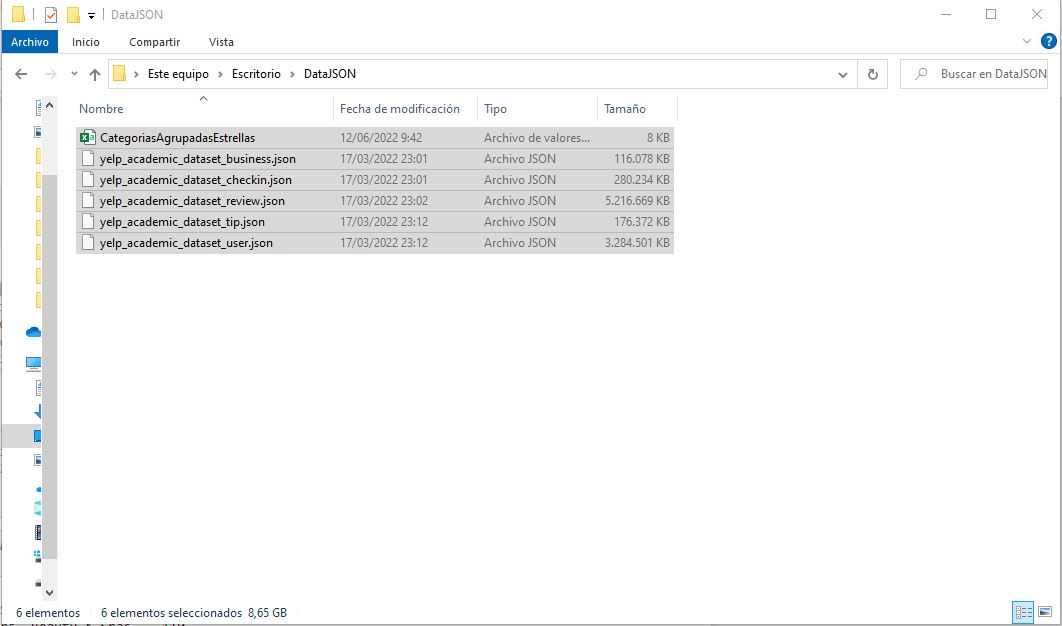

In [18]:
Image("C:/Users/USUARIO/Desktop/DataJSON/explorararchivo.jpg")

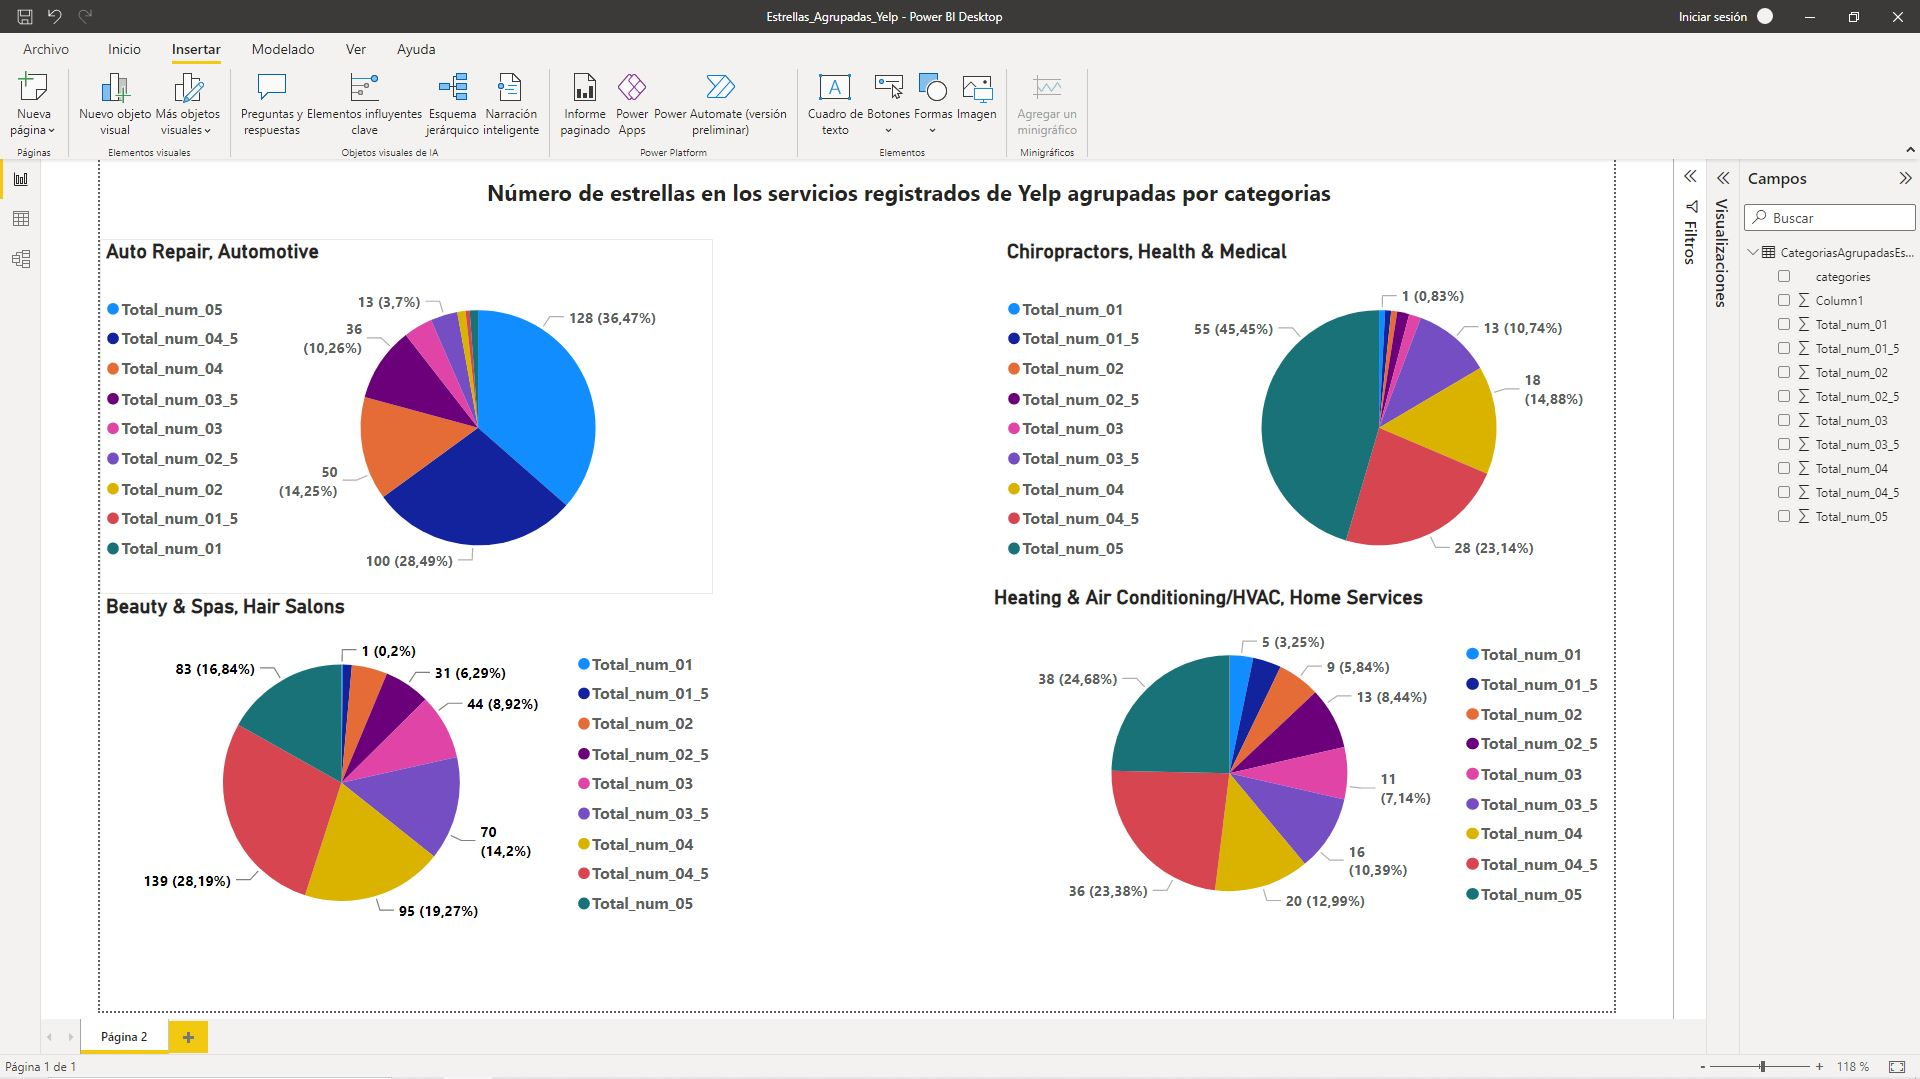

In [22]:
Image("C:/Users/USUARIO/Desktop/DataJSON/Yelp.jpg") # POWERBI

In [27]:
joinDF.sort_values(by=['Total_num_01'], ascending=False)

,categories,Total_num_05,Total_num_04_5,Total_num_04,Total_num_03_5,Total_num_03,Total_num_02_5,Total_num_02,Total_num_01_5,Total_num_01
47,"Real Estate, Apartments, Home Services",3,10,17,23,40,44,46,27,28
34,"Hotels & Travel, Hotels, Event Planning & Serv...",2,13,26,44,32,41,40,35,23
14,"Event Planning & Services, Hotels, Hotels & Tr...",3,11,43,40,44,36,43,30,21
56,"Apartments, Real Estate, Home Services",1,10,22,33,34,39,44,26,21
106,"Apartments, Home Services, Real Estate",7,5,18,21,26,42,57,23,19
...,...,...,...,...,...,...,...,...,...,...
16,"Automotive, Oil Change Stations",7,10,12,16,3,4,1,1,1
107,"Food, Convenience Stores",2,3,6,7,8,3,2,1,1
63,"Beauty & Spas, Shopping, Cosmetics & Beauty Su...",2,3,4,4,11,4,2,1,1
37,"Laundry Services, Dry Cleaning & Laundry, Loca...",3,6,12,9,3,14,9,1,1


### Conclusión
Con estos resultados ya podría redactar un informe al **cliente X** y recomendarle que con los datos recogidos del buscador Yelp
**los negocios mejor valorados por la comunidad de Yelp** para realizar una posible inversión serían entre otros:
- **Reading Terminal Market**	PA	Philadelphia	Candy Stores, Shopping, Department Stores, Fas...	51 N 12th St,	**4014 valoraciones positivas de 5 estrellas**
- **Oceana Grill**	LA	New Orleans	Restaurants, Seafood, Cajun/Creole, Breakfast ...	739 Conti St	**4012 valoraciones positivas de 5 estrellas**
- **Hattie B’s Hot Chicken - Nashville**	TN	Nashville	American (Traditional), Chicken Shop, Southern...	112 19th Ave S	**3838 valoraciones positivas de 5 estrellas**
- **Acme Oyster House**	LA	New Orleans	Live/Raw Food, Seafood, Restaurants, Cajun/Creole	724 Iberville St	**3645 valoraciones positivas de 5 estrellas**
- **Commander's Palace**	LA	New Orleans	French, Restaurants, Cocktail Bars, Nightlife,...	1403 Washington Ave	**3095 valoraciones positivas de 5 estrellas**
- **Ruby Slipper - New Orleans**	LA	New Orleans	Restaurants, American (Traditional), American ...	200 Magazine St	**3075 valoraciones positivas de 5 estrellas**
- **Los Agaves**	CA	Santa Barbara	Mexican, Restaurants	600 N Milpas St	**2693 valoraciones positivas de 5 estrellas**
- **Pappy's Smokehouse**	MO	Saint Louis	Food, Restaurants, Caterers, Smokehouse, Barbe...	**3106 Olive St	2675 valoraciones positivas de 5 estrellas**
- **Cochon Butcher**	LA	New Orleans	Shopping, Butcher, Restaurants, Sandwiches, Fo...	930 Tchoupitoulas St	**2537 valoraciones positivas de 5 estrellas**
- **Luke**	LA	New Orleans	German, Restaurants, Seafood, Cocktail Bars, F...	333 Saint Charles Ave	**2365 valoraciones positivas de 5 estrellas**

Respecto a la 2º parte del problema, **las categorías mejor valoradas** son:
- **Auto Repair, Automotive**
- **Beauty & Spas, Hair Salons**	
- **Chiropractors, Health & Medical**	
- **Heating & Air Conditioning/HVAC, Home Services**
 
**Las categorías peor valoradas** son:
- **Real Estate, Apartments, Home Services**	
- **Hotels & Travel, Hotels, Event Planning & Serv...**	
- **Event Planning & Services, Hotels, Hotels & Tr...**

**Autor: Carlos Mir Martínez**

**Fecha: 13/06/2022**
